<a href="https://colab.research.google.com/github/timfitz196/Big-Data-Conpects/blob/main/manga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [379]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [380]:
import os
os.chdir("/content/drive/MyDrive/data/Data Aqu proj")
!pwd

/content/drive/MyDrive/data/Data Aqu proj


In [381]:
!pip install bs4

In [382]:
from bs4 import BeautifulSoup
import http.client
import urllib.request
import pandas as pd

# Kaggle dataset
Loaded the dataset

dropped rows with missing values

Limited it to the top 2000

Split date columns to start and end date

Created Start Year column

In [383]:
csv_file = open('top_animes.csv')
csv_file.close()

In [384]:
Anime = pd.read_csv('top_animes.csv')
Anime.head()


,Episodes,Emition_Date,Users,Rank,Title,Score
0,TV (28 eps),Sep 2023 -,"500,460",1,Sousou no Frieren,9.13
1,TV (64 eps),Apr 2009 - Jul 2010,"3,294,991",2,Fullmetal Alchemist: Brotherhood,9.09
2,TV (24 eps),Apr 2011 - Sep 2011,"2,527,835",3,Steins;Gate,9.07
3,TV (51 eps),Apr 2015 - Mar 2016,"620,968",4,Gintama°,9.06
4,TV (10 eps),Apr 2019 - Jul 2019,"2,229,725",5,Shingeki no Kyojin Season 3 Part 2,9.05


In [385]:
Anime = Anime.dropna()

In [386]:
Anime = Anime.head(2000)

In [387]:
date_col = "Emition_Date"

# Step 1: Split on the dash
Anime[["Start", "End"]] = Anime[date_col].str.split("-", n=1, expand=True)

# Step 2: Clean whitespace
Anime["Start"] = Anime["Start"].str.strip()
Anime["End"] = Anime["End"].str.strip()
Anime = Anime.drop(columns=[date_col])
Anime["Users"] = Anime["Users"].str.replace(",", "").astype(int)
Anime.head()

,Episodes,Users,Rank,Title,Score,Start,End
0,TV (28 eps),500460,1,Sousou no Frieren,9.13,Sep 2023,
1,TV (64 eps),3294991,2,Fullmetal Alchemist: Brotherhood,9.09,Apr 2009,Jul 2010
2,TV (24 eps),2527835,3,Steins;Gate,9.07,Apr 2011,Sep 2011
3,TV (51 eps),620968,4,Gintama°,9.06,Apr 2015,Mar 2016
4,TV (10 eps),2229725,5,Shingeki no Kyojin Season 3 Part 2,9.05,Apr 2019,Jul 2019


In [388]:

# Rename columns to match desired output
Anime = Anime.rename(columns={
    'Start': 'Start Date',
    'End': 'End Date',
    'Rank': 'Anime Ranking',
    'Score': 'Anime Rating'
})

Anime = Anime[["Title", "Episodes", "Start Date", "End Date","Users", "Anime Ranking", "Anime Rating"]]

Anime.head()

,Title,Episodes,Start Date,End Date,Users,Anime Ranking,Anime Rating
0,Sousou no Frieren,TV (28 eps),Sep 2023,,500460,1,9.13
1,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009,Jul 2010,3294991,2,9.09
2,Steins;Gate,TV (24 eps),Apr 2011,Sep 2011,2527835,3,9.07
3,Gintama°,TV (51 eps),Apr 2015,Mar 2016,620968,4,9.06
4,Shingeki no Kyojin Season 3 Part 2,TV (10 eps),Apr 2019,Jul 2019,2229725,5,9.05


In [389]:
top10 = Anime.sort_values("Anime Rating", ascending=False).head(10)
bottom10 = Anime.sort_values("Anime Rating", ascending=True).head(10)

display(top10)
display(bottom10)


,Title,Episodes,Start Date,End Date,Users,Anime Ranking,Anime Rating
0,Sousou no Frieren,TV (28 eps),Sep 2023,,500460,1,9.13
1,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009,Jul 2010,3294991,2,9.09
2,Steins;Gate,TV (24 eps),Apr 2011,Sep 2011,2527835,3,9.07
3,Gintama°,TV (51 eps),Apr 2015,Mar 2016,620968,4,9.06
4,Shingeki no Kyojin Season 3 Part 2,TV (10 eps),Apr 2019,Jul 2019,2229725,5,9.05
5,Hunter x Hunter (2011),TV (148 eps),Oct 2011,Sep 2014,2778988,6,9.04
7,Gintama',TV (51 eps),Apr 2011,Mar 2012,547852,8,9.03
6,Bleach: Sennen Kessen-hen,TV (13 eps),Oct 2022,Dec 2022,516729,7,9.03
9,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV (13 eps),Apr 2022,Jun 2022,897905,10,9.02
8,Gintama': Enchousen,TV (13 eps),Oct 2012,Mar 2013,320940,9,9.02


,Title,Episodes,Start Date,End Date,Users,Anime Ranking,Anime Rating
1998,B'T X,TV (25 eps),Apr 1996,Sep 1996,12022,1999,7.03
1999,Chou Mashin Eiyuuden Wataru,TV (51 eps),Oct 1997,Sep 1998,1979,2000,7.03
1971,Show By Rock!!,TV (12 eps),Apr 2015,Jun 2015,85553,1972,7.04
1974,Tsuideni Tonchinkan,TV (43 eps),Oct 1987,Oct 1988,914,1975,7.04
1975,Umineko no Naku Koro ni,TV (26 eps),Jul 2009,Dec 2009,219287,1976,7.04
1976,Usavich II,TV (13 eps),Oct 2007,Jan 2008,5069,1977,7.04
1973,Tsugumomo,TV (12 eps),Apr 2017,Jun 2017,197765,1974,7.04
1972,Sore ga Seiyuu!,TV (13 eps),Jul 2015,Sep 2015,53961,1973,7.04
1979,Zettai Muteki Raijin-Oh,TV (51 eps),Apr 1991,Mar 1992,2198,1980,7.04
1997,Jashin-chan Dropkick,TV (11 eps),Jul 2018,Sep 2018,122363,1998,7.04


In [390]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

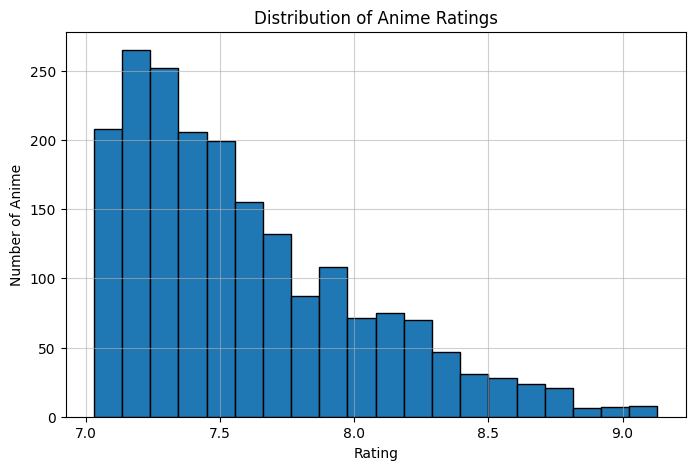

In [391]:

plt.figure(figsize=(8, 5))
plt.hist(Anime["Anime Rating"], bins=20, edgecolor='black')
plt.title("Distribution of Anime Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Anime")
plt.grid(True,  alpha=0.6)
plt.show()

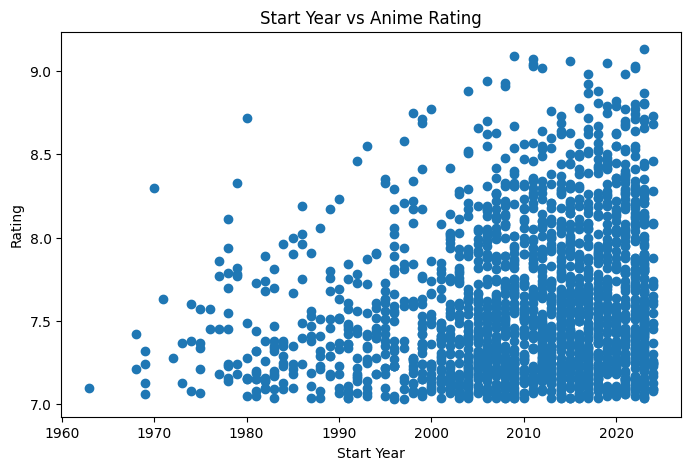

In [392]:
Anime["Start Year"] = pd.to_datetime( Anime["Start Date"],format="mixed", errors="coerce").dt.year

plt.figure(figsize=(8,5))
plt.scatter(Anime["Start Year"], Anime["Anime Rating"])
plt.xlabel("Start Year")
plt.ylabel("Rating")
plt.title("Start Year vs Anime Rating")
plt.show()



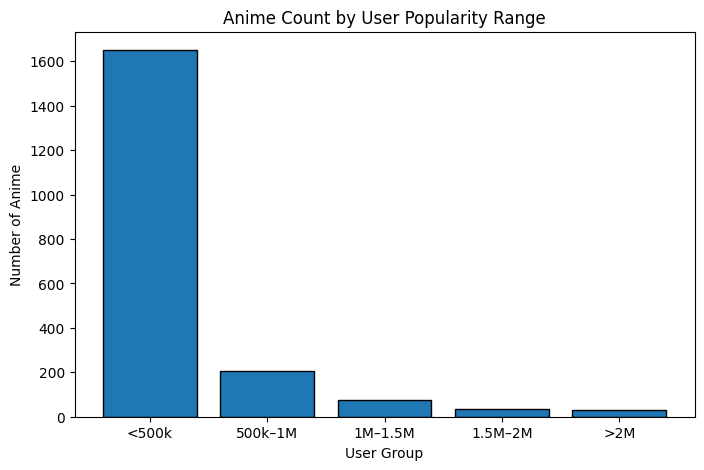

In [393]:
# Define user bins
bins = [0, 500000, 1000000, 1500000, 2000000, float("inf")]
labels = ["<500k", "500k–1M", "1M–1.5M", "1.5M–2M", ">2M"]

user_group = pd.cut(Anime["Users"], bins=bins, labels=labels)

# Count anime in each range
counts = user_group.value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(counts.index, counts.values, edgecolor='black')
plt.xlabel("User Group")
plt.ylabel("Number of Anime")
plt.title("Anime Count by User Popularity Range")
plt.show()


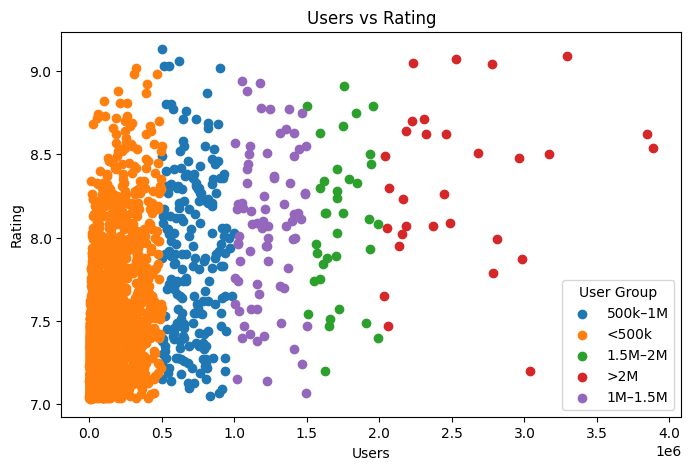

In [394]:
plt.figure(figsize=(8,5))

#Loop through each user group label
for group in set(user_group):
    subset = Anime[user_group == group]
    plt.scatter(subset["Users"], subset["Anime Rating"], label=group)

plt.xlabel("Users")
plt.ylabel("Rating")
plt.title("Users vs Rating")
plt.legend(title="User Group")
plt.show()


# Web Scraping
Requested data from the https://myanimelist.net/topmanga.php?limit={limit}
created a loop for limit so that it would keep looping and requesting from different urls 40 times replaing limit in incraments of 50 to get 2000 rows of data

Extracted:
Manga titles,
Manga ratings,
Manga ranking,
Dates,
Book types,
Volumes,
Users

And cleaned data where nessacary


In [395]:
Ranking = []
name = []
Book_type =[]
Volumes = []
Start =[]
End =[]
Users = []
Rating = []

for limit in range(0, 40 * 50, 50):
  url = f"https://myanimelist.net/topmanga.php?limit={limit}"
  request = urllib.request.Request(url)
  opener = urllib.request.build_opener()
  response = opener.open(request)
  raw_html = response.read().decode("utf-8")
  document = BeautifulSoup(raw_html, 'html.parser')
  table = document.find("table", {"class":"top-ranking-table"})
  data_rows = table.find_all("tr")[1:] # Skip the first two header rows

  for row in data_rows:
    cells = row.find_all("td")
    Ranking.append(cells[0].span.get_text())
    name.append(cells[1].h3.a.get_text())
    book_info = cells[1].div.get_text().strip()
    parts = book_info.split('\n')
    splitBV = parts[2].strip()
    Book_type, Volumes = splitBV.split('(', 1)
    Book_type = Book_type.strip()
    Volumes = Volumes.strip(') ')
    full_date = parts[3].strip()
    if "-" in full_date:
        start, end = full_date.split("-", 1)
        start = start.strip()
        end = end.strip()
    else:
        start = full_date.strip()
        end = ""
    Start.append(start)
    End.append(end)
    Members = parts[4].strip()
    number = Members.replace("members", "").strip()
    Users.append(int(number.replace(",", "")))
    Rating.append(cells[2].span.get_text())

manga = pd.DataFrame({
    "Title": name,
    "Book Type": Book_type,
    "Voumes": Volumes,
    "Start Date": Start,
    "End": End,
    "Users": Users,
    "Manga Ranking": Ranking,
    "Manga Rating": Rating
})

manga.head()


,Title,Book Type,Voumes,Start Date,End,Users,Manga Ranking,Manga Rating
0,Berserk,Manga,1 vols,Aug 1989,,773385,1,9.47
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,Manga,1 vols,Jan 2004,Apr 2011,306309,2,9.33
2,Vagabond,Manga,1 vols,Sep 1998,May 2015,441464,3,9.27
3,One Piece,Manga,1 vols,Jul 1997,,680099,4,9.22
4,Monster,Manga,1 vols,Dec 1994,Dec 2001,280194,5,9.16


In [396]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

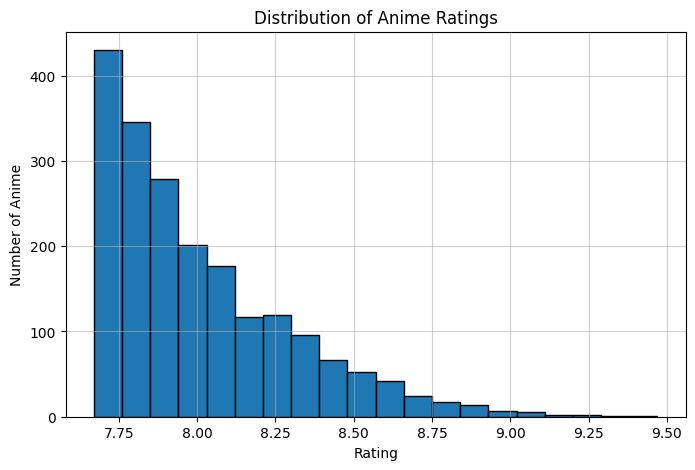

In [397]:
manga["Manga Rating"] = pd.to_numeric(manga["Manga Rating"], errors="coerce")
plt.figure(figsize=(8, 5))
plt.hist(manga["Manga Rating"], bins=20, edgecolor='black')
plt.title("Distribution of Manga Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Manga")
plt.grid(True,  alpha=0.6)
plt.show()

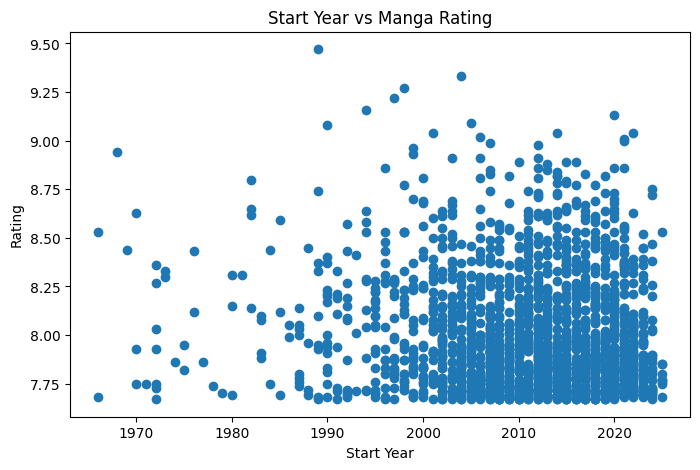

In [399]:
manga["Start Year"] = pd.to_datetime(manga["Start Date"], format="mixed", errors="coerce").dt.year


plt.figure(figsize=(8,5))
plt.scatter(manga["Start Year"], manga["Manga Rating"])
plt.xlabel("Start Year")
plt.ylabel("Rating")
plt.title("Start Year vs Manga Rating")
plt.show()


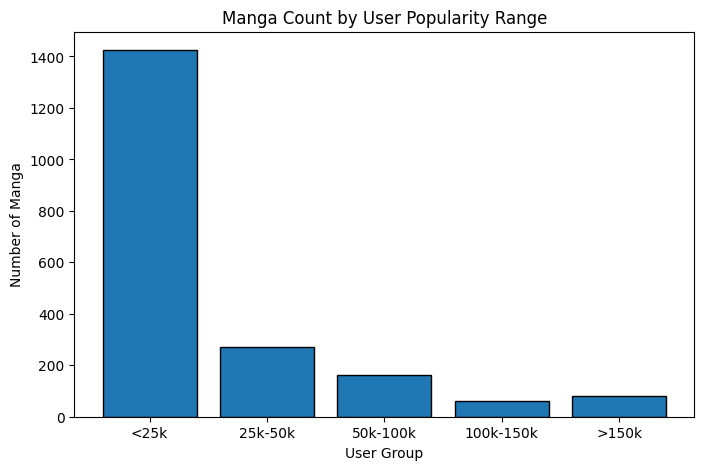

In [400]:
#Define user bins
bins = [0,25000, 50000, 100000, 150000, float("inf")]
labels = ["<25k", "25k-50k", "50k-100k", "100k-150k", ">150k"]

user_group = pd.cut(manga["Users"], bins=bins, labels=labels)

#Count anime in each range
counts = user_group.value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(counts.index, counts.values, edgecolor='black')
plt.xlabel("User Group")
plt.ylabel("Number of Manga")
plt.title("Manga Count by User Popularity Range")
plt.show()

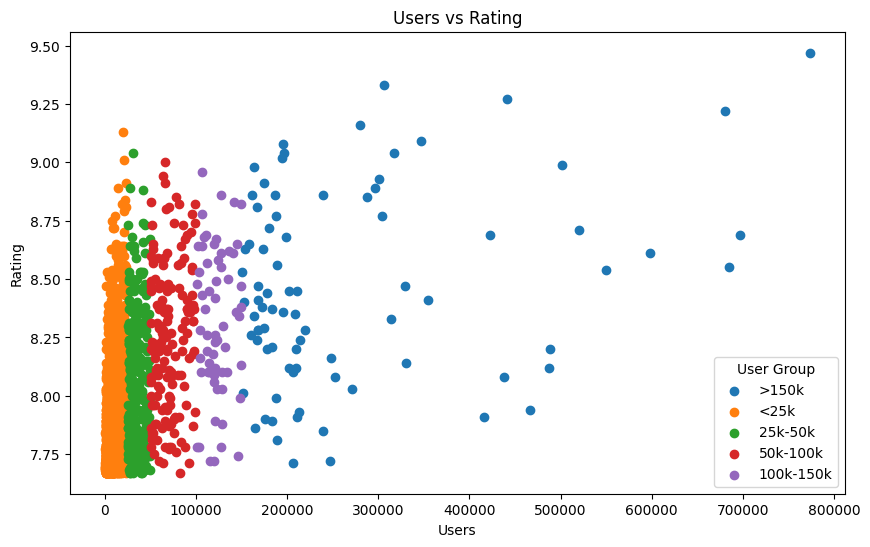

In [401]:
plt.figure(figsize=(10,6))
for group in user_group.unique():
    subset = manga[user_group == group]
    plt.scatter(subset["Users"], subset["Manga Rating"], label=group)
plt.xlabel("Users")
plt.ylabel("Rating")
plt.title("Users vs Rating")
plt.legend(title="User Group")
plt.show()

# Merged Dataset

Merged the kaggle and webscraped datasets using an outer join and by the Key-Title
The merge works as they both share common titles and then the rows that do not have full data I would still be able to do comparitive analysis on them

I created visualisations for:

Count of Anime vs Manga Rows vs Both

Anime & Manga Heatmap

Distribution of Anime and Manga Ratings

Ranking vs Rating (Anime & Manga)

Which is Higher Rated? (Anime vs Manga)

Average Rating by Start Year

Rating Distribution Over Time

Top Anime Ranking vs Manga Ranking

Top Manga Ranking vs Anime Ranking

Anime Rating - Manga Rating (If anime came first or manga)

KDE of Rating Differences (Anime - Manga)

In [402]:
merged = pd.merge(Anime, manga, on="Title", how="outer")

In [403]:
merged.to_csv('merged.csv', index=False)

In [404]:
merged = pd.read_csv('merged.csv')

display(merged)


/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Title,Episodes,Start Date_x,End Date,Users_x,Anime Ranking,Anime Rating,Start Year_x,Book Type,Voumes,Start Date_y,End,Users_y,Manga Ranking,Manga Rating,Start Year_y
0,"""Bungaku Shoujo"" Series",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manga,1 vols,Apr 2006,Aug 2008,8039.0,782.0,8.00,2006.0
1,"""Fushigi"" Toriatsukaimasu: Tsukumodou Kottouten",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manga,1 vols,Oct 2006,Mar 2010,1980.0,1672.0,7.73,2006.0
2,"""Oshi no Ko""",TV (11 eps),Apr 2023,Jun 2023,735786.0,42.0,8.71,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#Gal to Gal no Yuri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manga,1 vols,Jun 2025,NaN,1731.0,1586.0,7.75,2025.0
4,'Til Debt Do Us Part,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manga,1 vols,Sep 2020,Dec 2021,5656.0,1744.0,7.71,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,xxxHOLiC: AnotherHOLiC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manga,1 vols,Aug 2006,Aug 2006,3475.0,1661.0,7.73,2006.0
3526,xxxHOLiC: Rei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manga,1 vols,Mar 2013,NaN,15002.0,485.0,8.19,2013.0
3527,xxxHOLiC◆Kei,TV (13 eps),Apr 2008,Jun 2008,142540.0,222.0,8.21,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3528,½ Prince,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manga,1 vols,Oct 2004,Aug 2005,7698.0,958.0,7.93,2004.0


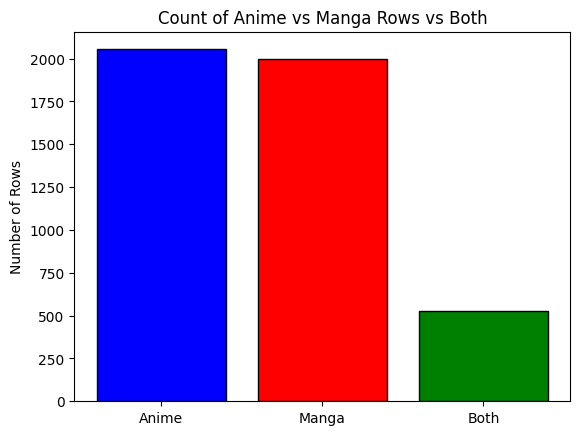

In [405]:
anime_count = merged["Anime Rating"].count()
manga_count = merged["Manga Rating"].count()

both_count = (
    (merged["Anime Rating"] == merged["Anime Rating"]) &
    (merged["Manga Rating"] == merged["Manga Rating"])
).sum()

plt.bar(["Anime", "Manga", "Both"],
        [anime_count, manga_count, both_count],
        color=["blue", "red", "green"],edgecolor='black')

plt.ylabel("Number of Rows")
plt.title("Count of Anime vs Manga Rows vs Both")
plt.show()


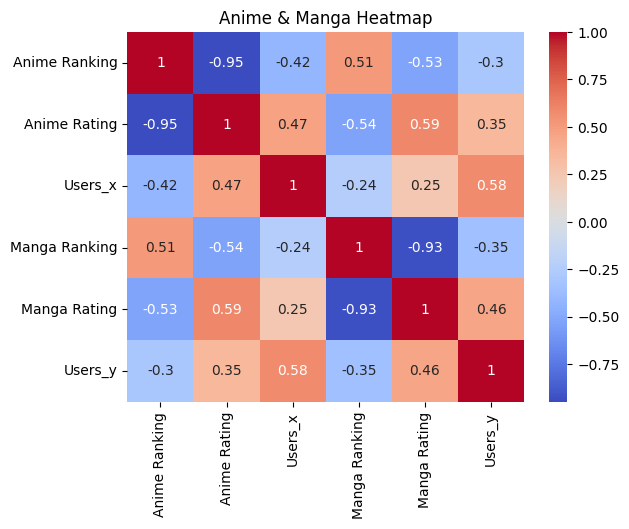

In [406]:
sns.heatmap(
    merged[["Anime Ranking","Anime Rating","Users_x",
            "Manga Ranking","Manga Rating","Users_y"]].corr(),
    annot=True, cmap="coolwarm"
)
plt.title("Anime & Manga Heatmap")
plt.show()


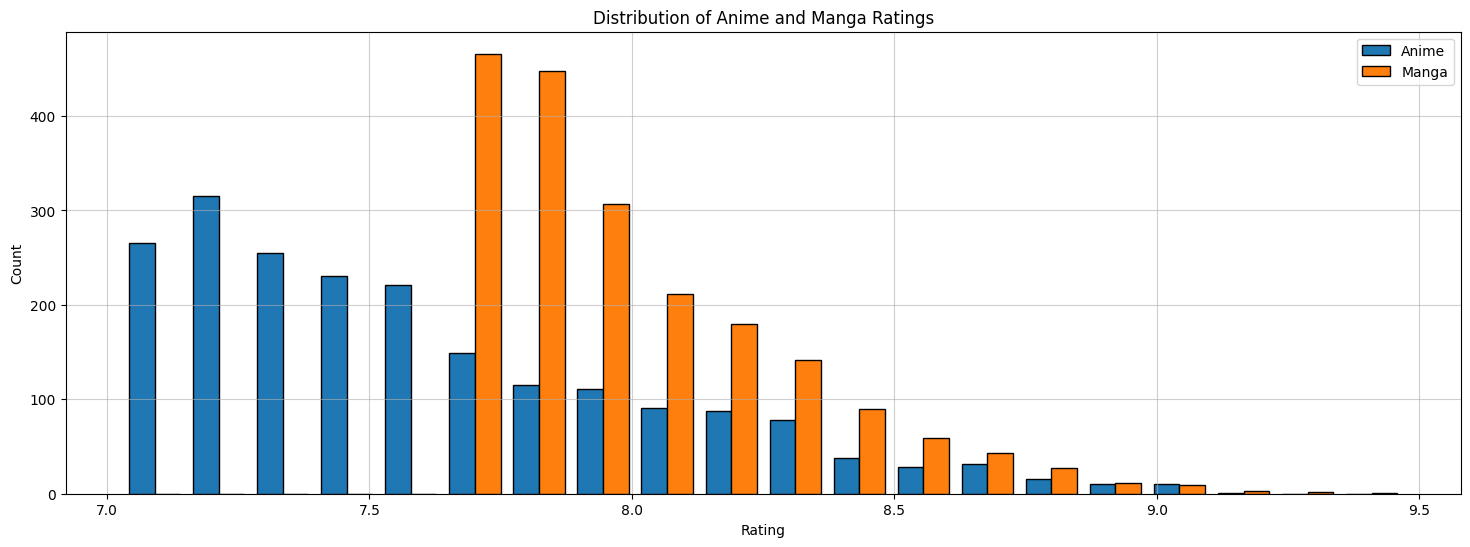

In [407]:
plt.figure(figsize=(18, 6))
plt.hist([merged["Anime Rating"], merged["Manga Rating"]],
         bins=20,
         label=["Anime", "Manga"],
         edgecolor='black')
plt.title("Distribution of Anime and Manga Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

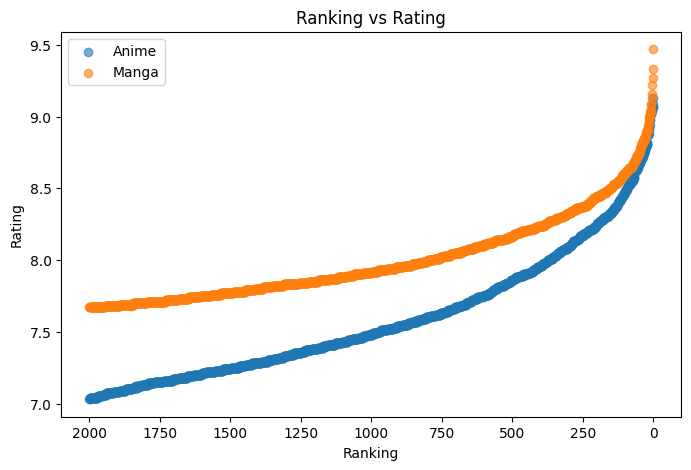

In [408]:
plt.figure(figsize=(8,5))
plt.scatter(merged["Anime Ranking"], merged["Anime Rating"], alpha=0.6, label="Anime")
plt.scatter(merged["Manga Ranking"], merged["Manga Rating"], alpha=0.6, label="Manga")
plt.gca().invert_xaxis()  # rank 1 = best
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Ranking vs Rating")
plt.legend()
plt.show()


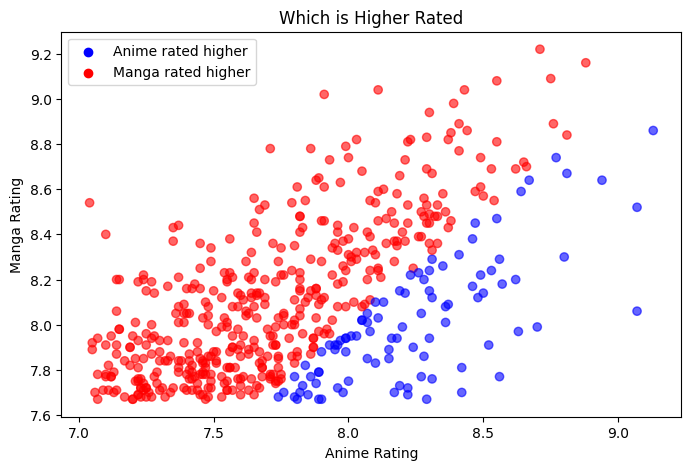

In [409]:
colors = (merged["Anime Rating"] >= merged["Manga Rating"]).map({True: "blue", False: "red"})

plt.figure(figsize=(8,5))
plt.scatter(merged["Anime Rating"], merged["Manga Rating"], c=colors, alpha=0.6)
plt.scatter([], [], color="blue", label="Anime rated higher")
plt.scatter([], [], color="red", label="Manga rated higher")
plt.xlabel("Anime Rating")
plt.ylabel("Manga Rating")
plt.title("Which is Higher Rated")
plt.legend()
plt.show()



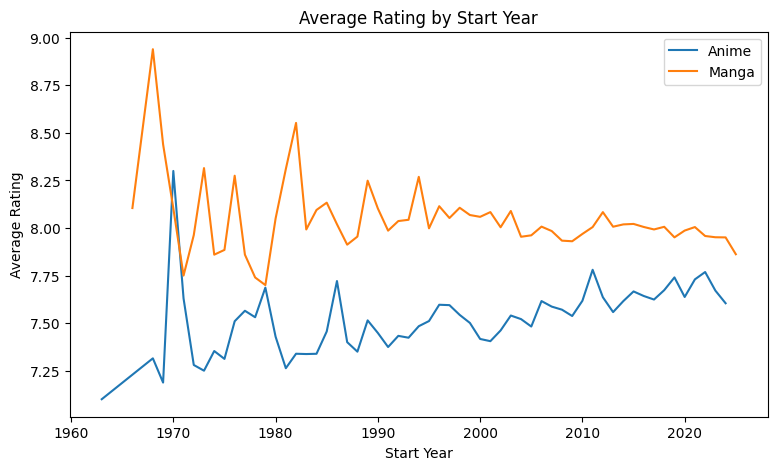

In [410]:
anime_yearly = merged.groupby("Start Year_x")["Anime Rating"].mean()
manga_yearly = merged.groupby("Start Year_y")["Manga Rating"].mean()

plt.figure(figsize=(9,5))
plt.plot(anime_yearly, label="Anime")
plt.plot(manga_yearly, label="Manga")
plt.xlabel("Start Year")
plt.ylabel("Average Rating")
plt.title("Average Rating by Start Year")
plt.legend()
plt.show()


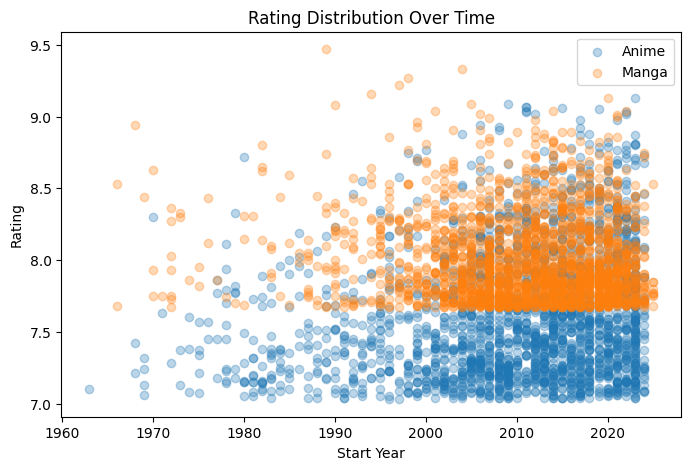

In [411]:
plt.figure(figsize=(8,5))

plt.scatter(merged["Start Year_x"], merged["Anime Rating"], alpha=0.3, label="Anime")
plt.scatter(merged["Start Year_y"], merged["Manga Rating"], alpha=0.3, label="Manga")

plt.xlabel("Start Year")
plt.ylabel("Rating")
plt.title("Rating Distribution Over Time")
plt.legend()
plt.show()


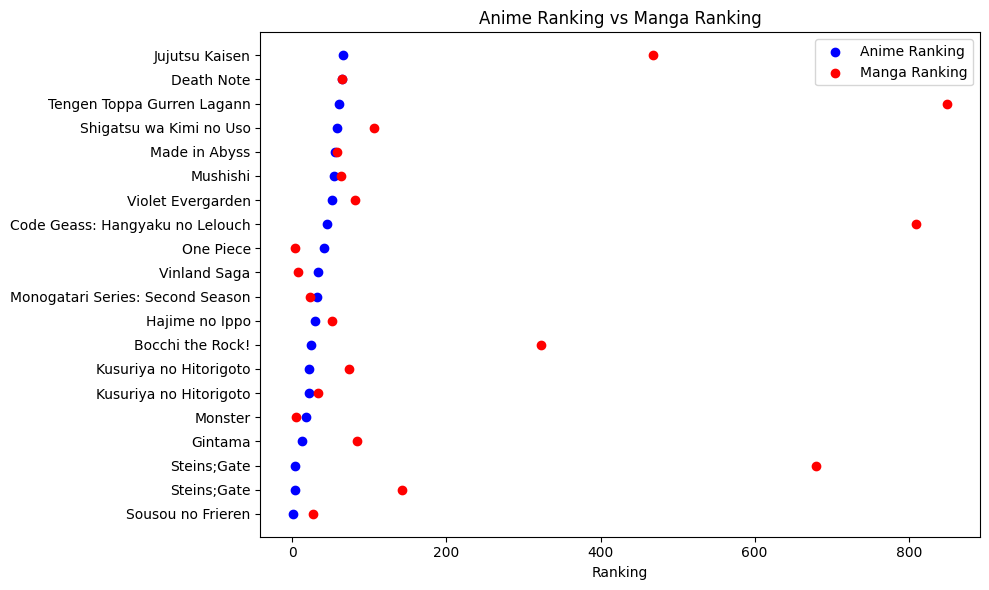

In [413]:
#Only titles with both anime and manga ranking
top = merged[merged["Manga Ranking"] == merged["Manga Ranking"]].nsmallest(20, "Anime Ranking")

x_anime = top["Anime Ranking"]
x_manga = top["Manga Ranking"]
y = np.arange(len(top))

plt.figure(figsize=(10, 6))
plt.scatter(x_anime, y, color="blue", label="Anime Ranking")
plt.scatter(x_manga, y, color="red", label="Manga Ranking")

plt.gca()
plt.yticks(y, top["Title"])
plt.xlabel("Ranking")
plt.title("Anime Ranking vs Manga Ranking")
plt.legend()
plt.tight_layout()
plt.show()


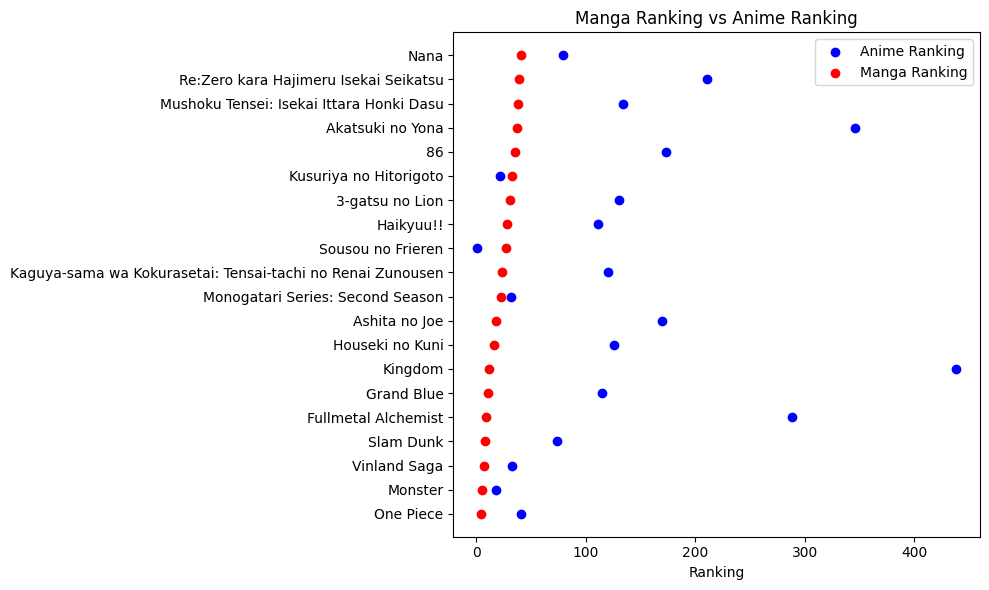

In [414]:
top = merged[merged["Anime Ranking"] == merged["Anime Ranking"]].nsmallest(20, "Manga Ranking")

x_anime = top["Anime Ranking"]
x_manga = top["Manga Ranking"]
y = np.arange(len(top))

plt.figure(figsize=(10, 6))
plt.scatter(x_anime, y, color="blue", label="Anime Ranking")
plt.scatter(x_manga, y, color="red", label="Manga Ranking")

plt.yticks(y, top["Title"])
plt.xlabel("Ranking")
plt.title("Manga Ranking vs Anime Ranking")
plt.legend()
plt.tight_layout()
plt.show()

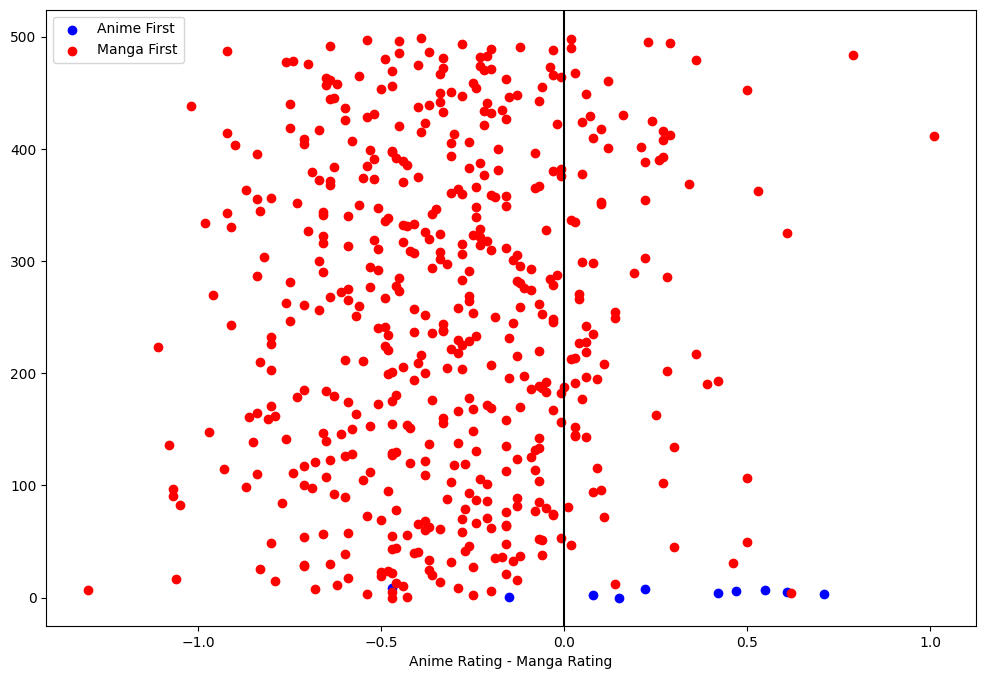

In [415]:

#Keep only rows that have both ratings
d = merged[(merged["Anime Rating"] == merged["Anime Rating"]) &
           (merged["Manga Rating"] == merged["Manga Rating"])]

# Which came first
anime_first = d["Start Year_x"] < d["Start Year_y"]
manga_first = d["Start Year_y"] < d["Start Year_x"]

# Rating difference
diff = d["Anime Rating"] - d["Manga Rating"]

plt.figure(figsize=(12,8))

plt.scatter(diff[anime_first], np.arange(anime_first.sum()), color="blue", label="Anime First")
plt.scatter(diff[manga_first], np.arange(manga_first.sum()), color="red", label="Manga First")

plt.axvline(0, color="black")
plt.xlabel("Anime Rating - Manga Rating")
plt.legend()
plt.show()


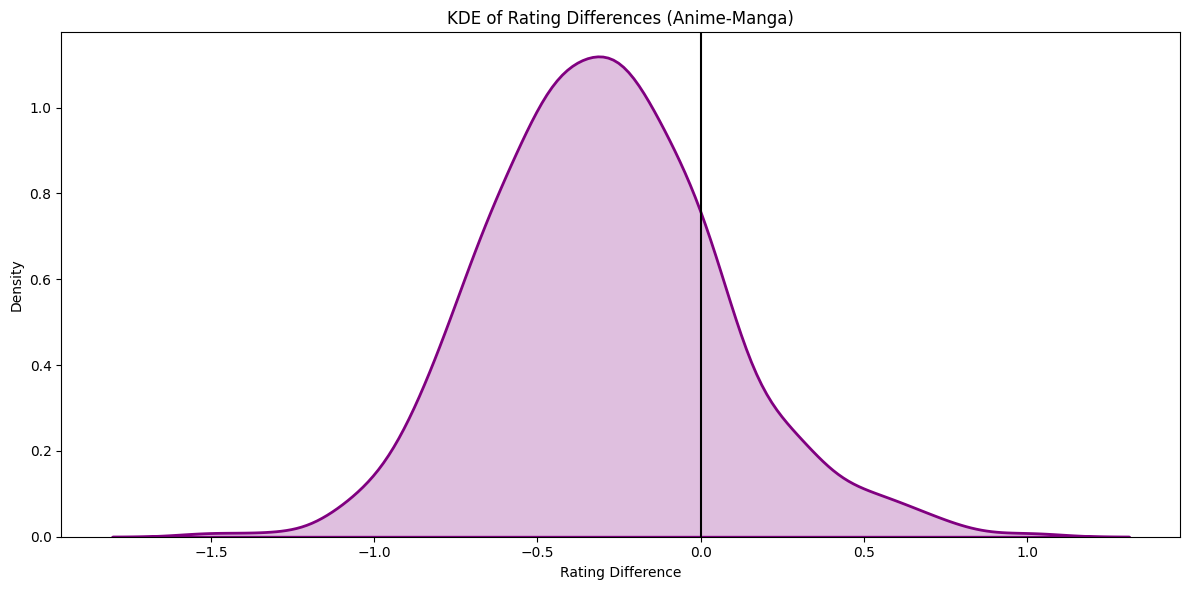

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt

#Keep rows where both ratings exist
d = merged[(merged["Anime Rating"] == merged["Anime Rating"]) &
           (merged["Manga Rating"] == merged["Manga Rating"])]

#Rating difference
diff = d["Anime Rating"] - d["Manga Rating"]

plt.figure(figsize=(12,6))

sns.kdeplot(diff, fill=True, color="purple", linewidth=2)

plt.axvline(0, color="black")
plt.title("KDE of Rating Differences (Anime-Manga)")
plt.xlabel("Rating Difference")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


# Prompts

In python how would I remove rows with empty data

How would you split a column into two columns

How would you turn a date column to just a year column + That as a format error

How do I group a numerical column into bins + How do I count the number of values in each bin?

How can I generate multiple URLs by increasing the limit parameter?

How can I extract the text before '(' and the text inside “()”

How can I count rows where multiple columns are not empty

How do I calculate the average rating per year

How do I select the top 20 rows based on one column, but only where another column is not empty

How do I draw a vertical line at x = 0 in a matplotlib plot